# Functions

(adapted from CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh)


Chapter 1 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

**Learning Objectives**

By the end of this session, you should be able to:
- Plot functions in Python with `sympy`, `matplotlib` and `numpy`
- Understand the exponential function $e^x$ and other common functions
- Understand odd and even functions

## Plot the function

Lots of people / texts will tell you to draw the function. When I took math courses, they spent a lot of time on sketching functions. It's 2020, and I carry a powerful computer in my pocket (i.e., my iPhone). As you can see, with a small amount of Python, we can plot functions in a web browser.

To borrow from an ad campaign, and one of my favorite college professors, here's 

<div class="alert alert-block alert-success">


**Hutchison's First Law: Just Plot It!**

This will tell you things like maximum or minimum values, whether it's continuous, how it behaves (e.g., is it only defined on a range of values), etc. Hopefully if you're not comfortable plotting functions in Python, you will be soon.
    
</div>

## Functions

Let's get back to the topic. As a reminder, a function maps numbers (e.g., 'x' values) to other numbers (e.g., 'y' values):

Obviously, it's nice to plot functions. For simple functions, we can use the `sympy` package (symbolic math).

For more complicated things, we'll use `matplotlib` later.

In [1]:
# import sympy and start a session
from sympy import init_session
init_session()


IPython console for SymPy 1.11.1 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



Sympy just defined a bunch of symbols we can use in our plots (e.g., x, y, z, t, etc.) and set up fancy formula printing. We can now import and call the `plot` function:

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sympy.plotting import plot


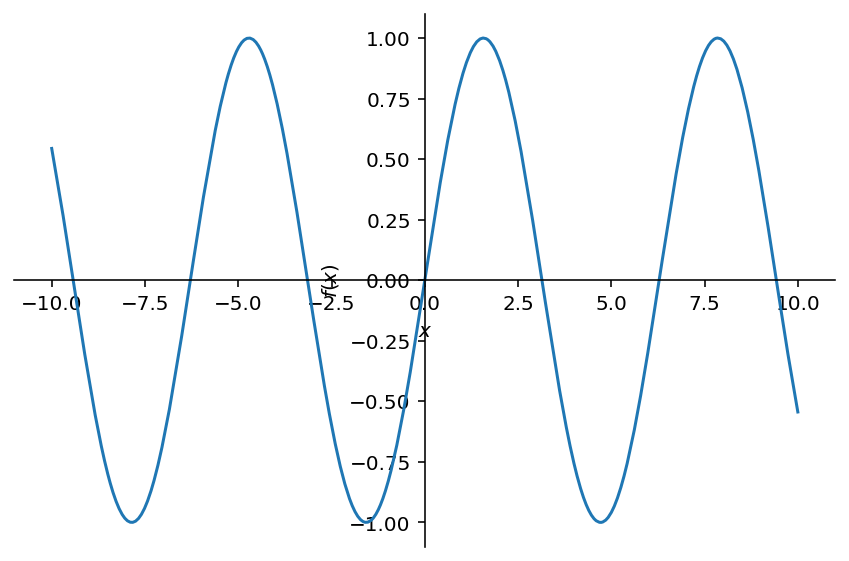

In [9]:
plot(sin(x))

**Nice !** We have a pretty easy way to plot functions in our Jupyter notebooks - we can learn to tweak the plots later (e.g., axes labels, etc.), but this is good enough for now.

We can plot multiple functions in one graph.

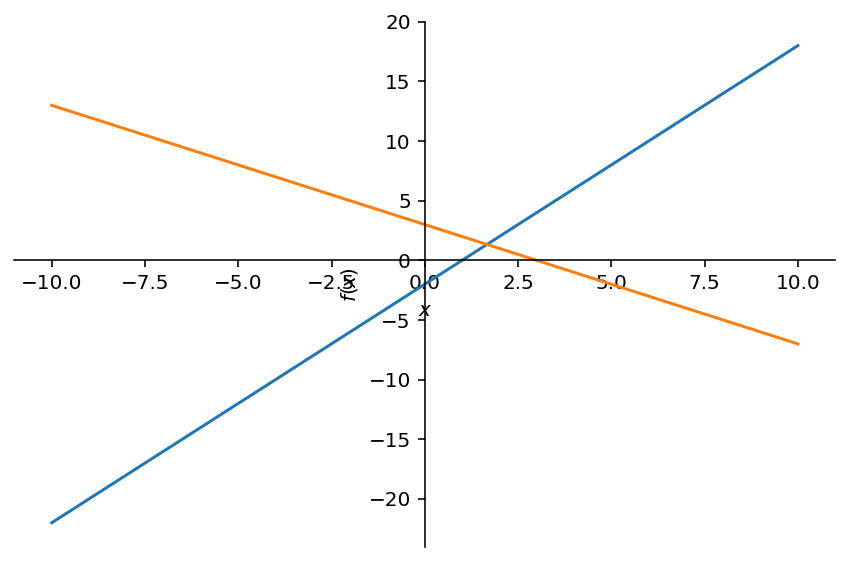

In [7]:
p1 = plot(2*x - 2, 3-x)

As a reminder, the slope of the lines can be calculated, e.g.
$$ slope = \frac{\Delta y}{\Delta x} = \frac{6 - 0}{4 - 1} = 2$$

### Quadratic Functions

Quadratic equations take the form:
$$ y(x) = ax^2 + bx + c$$

For example:

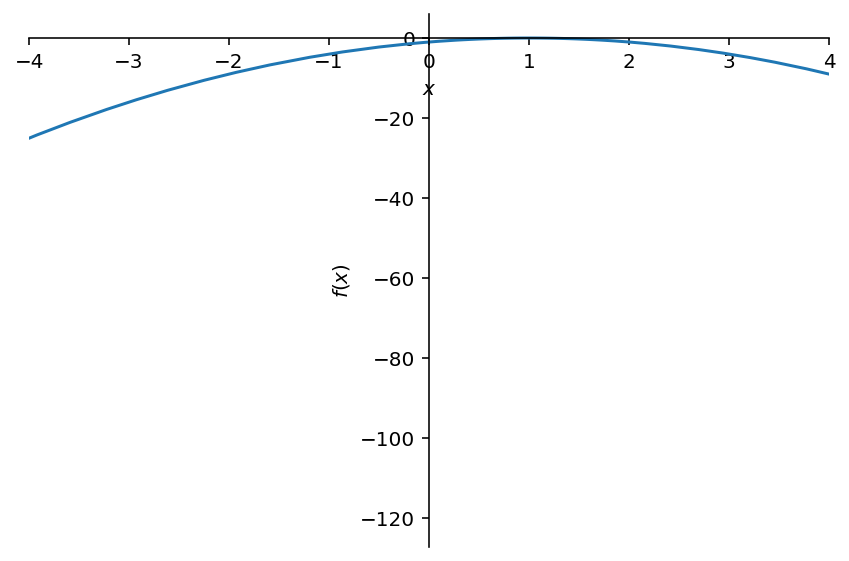

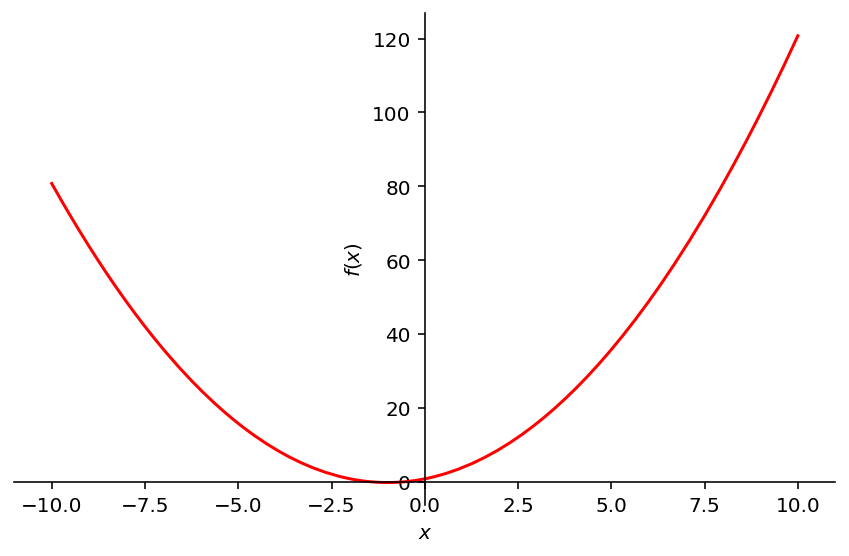

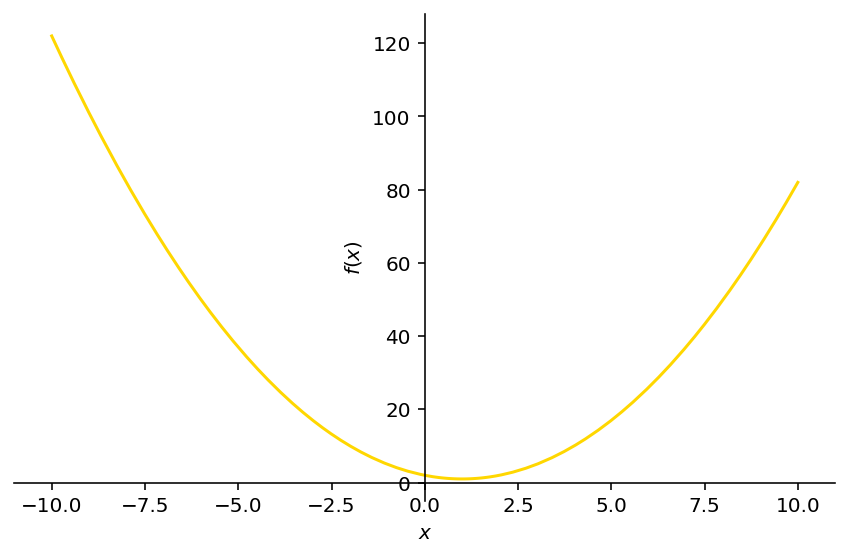

In [8]:
plot(-x**2 + 2*x - 1, xlim=(-4, 4))  # set the x-limit  -4 to +4
plot(x**2 + 2*x + 0.75, line_color='red')
plot(x**2 - 2*x + 2, line_color='gold') # can be any HTML color name

You probably remember that we can solve quadratic equations:
$$ x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

The $\sqrt{b^2-4ac}$ part is important, since it tells us if we get real numbers for our solutions when $y(x) = 0$

**Chemical Equlibrium example:**

Let's consider a chemistry example from the textbook:

$$PCl_5 (g) -> PCl_3 (g) + Cl_2 (g)$$

So we can write an equilibrium constant:

$$K_P = \frac{P_{PCl_3}P_{Cl_2}}{P_{PCl_5}}$$

If we start with 1.0 atm pressure, then we get:

$$K_P = \frac{[x] \; [x]}{[1.0 - x]}$$

Then:

$$x^2 + K_P x − K_p = 0$$

In [9]:
Kp = 1.0 # arbitrary number to allow us to solve this numerically

# solve a quadratic = (-b +/- sqrt(b**2 - 4ac)) / 2a
x1 = (-Kp + np.sqrt(Kp**2 - 4*1*(-Kp))) / (2*1)
x2 = (-Kp - np.sqrt(Kp**2 - 4*1*(-Kp))) / (2*1)

print(round(x1,2))
print(round(x2,2)) # too many sig figs again...

print(round(1 - x1, 2))

0.62
-1.62
0.38


Obviously, we can't have negative numbers for pressures, so we can ignore one of these two solutions. Algebraically, we see:

$$
P_{\mathrm{Cl}_{2}}=P_{\mathrm{PCl}_{3}}=\frac{1}{2} \mathrm{K}_{\mathrm{p}}\left[1+\sqrt{1+4 / \mathrm{K}_{\mathrm{p}}}\right]
$$

And of course:
$$
P_{\mathrm{PCl}_{5}}=1.0- P_{\mathrm{Cl}_{2}}
$$

### Beyond Quadratics

Obviously, there are higher-order polynomial functions. We usually note the type or category of the polynomial by the highest-order exponent:

- $x$ - linear
- $x^2$ - quadratic
- $x^3$ - cubic
- $x^4$ - quartic
- $x^5$ - quintic

There are analytical ways to solve linear, quadratic, cubic, and quartic functions. It's been proven that [quintic](https://en.wikipedia.org/wiki/Quintic_function) equations cannot always be solved.

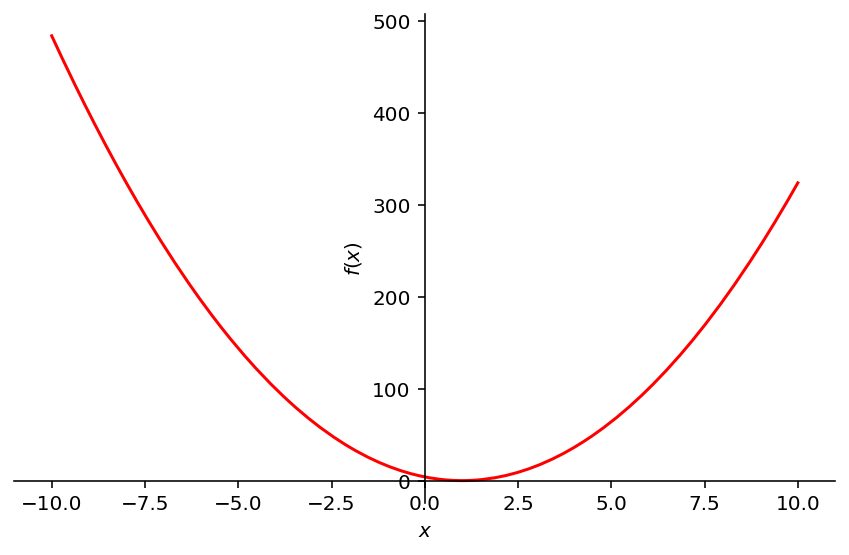

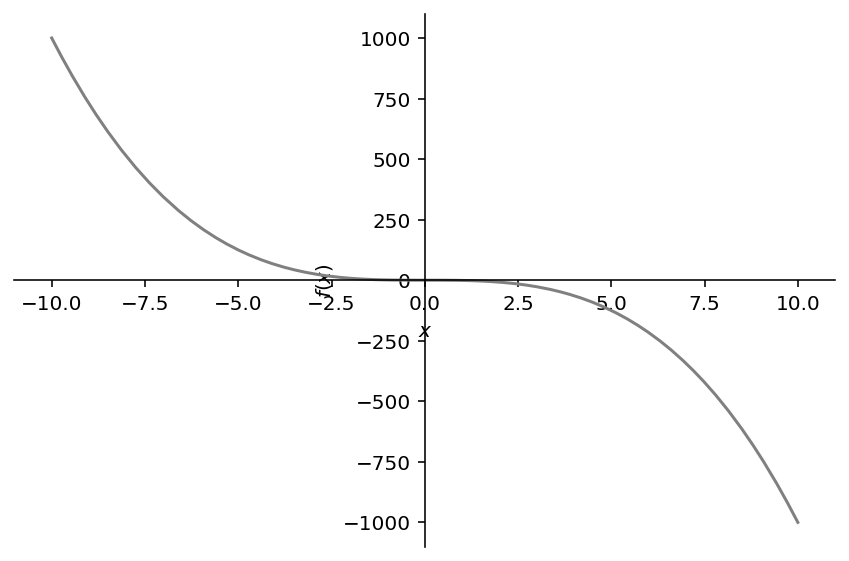

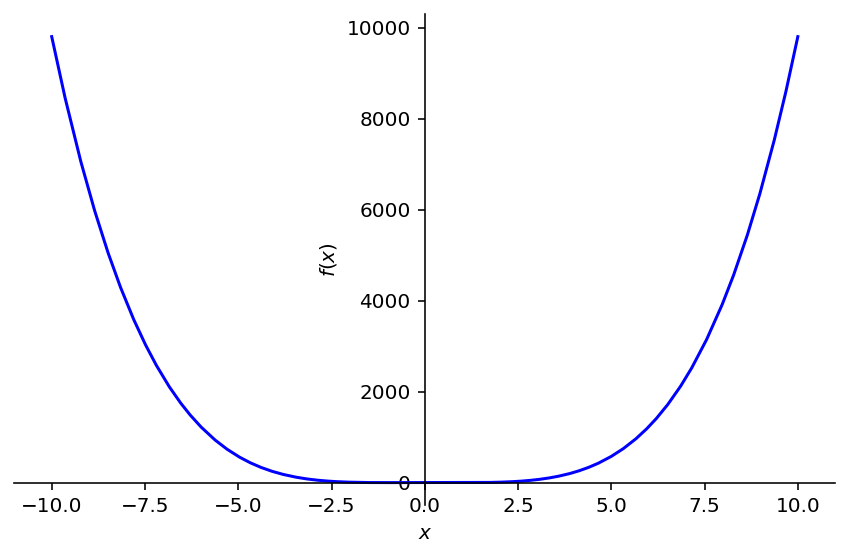

In [10]:
plot(4*(x-1)**2, line_color='red') # quadratic
plot(-x**3, line_color='grey') # cubic
plot((x**2 - 1)**2, line_color='blue') # quartic

### Odd and Even Functions

Think about the function $y = -x^3$ above. For any value $x$, we can see that:

$$y(x) = -y(-x)$$

In other words, the function is inverted on opposite side of $x = 0$. This is an example of an *odd function*. In contrast, $y = (x^2 - 1)^2$ is an *even function* where $y(x) = y(-x)$. It has mirror symmetry around $x = 0$.

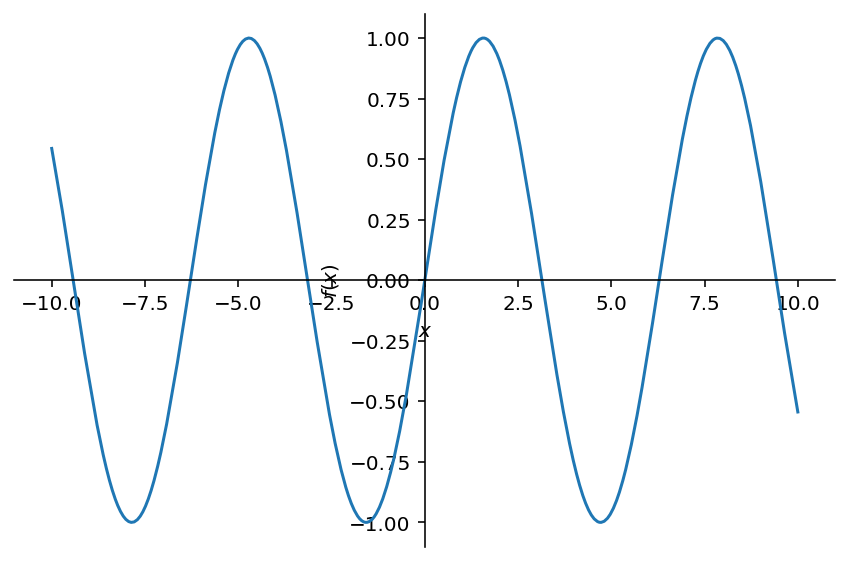

In [11]:
plot(sin(x))

Is $\sin(x)$ odd or even? - ODD

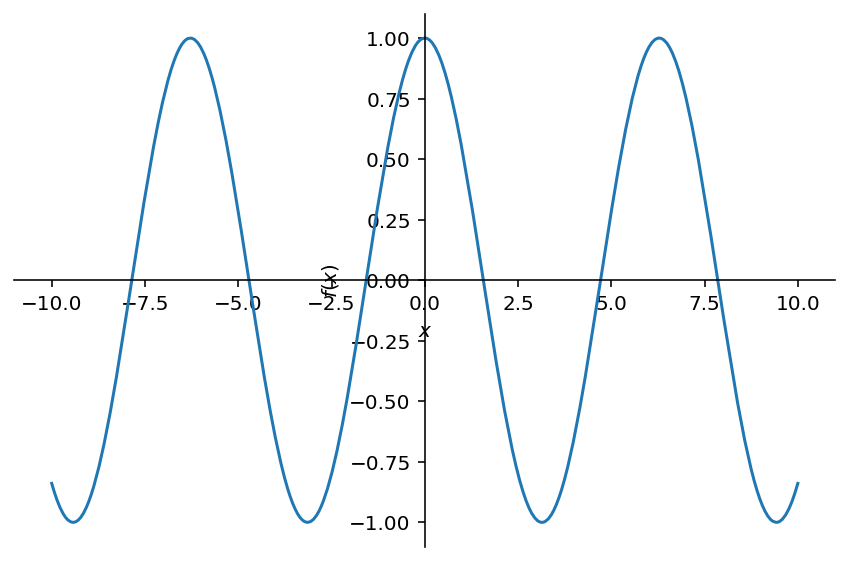

In [12]:
plot(cos(x))

What about $cos(x)$? Is it an odd or even function? - EVEN

**Note:** Some functions are neither, for example $y = 4(x-1)^2$ is not odd or even because it has *no* symmetry at all around $x = 0$.

<div class="alert alert-block alert-info">

***Why does this matter?***

For one, it's easier to sketch a function by hand if you know that it's even or odd, since there's some symmetry around $x = 0$.

More importantly, some kinds of integrals can be massively simplified if you know the function is odd or even. For example, consider;

$$\int_{-\infty}^{\infty} \sin x dx = 0$$

Since we know $\sin x$ is an odd function, *whatever* the integral from 0 to $\infty$ it will be exactly negated by the integral from $-\infty$ to 0.

We'll discuss this further when we get to integrals.
</div>

## Useful functions

**Exponentials.**

In many cases, growth can be much faster than linear, quadratic, etc. (e.g. COVID):

$$y = e^x$$

In [13]:
exp(x)

 x
ℯ 

There's also exponential decay (e.g, radioactive elements):

$$y = e^{-x}$$

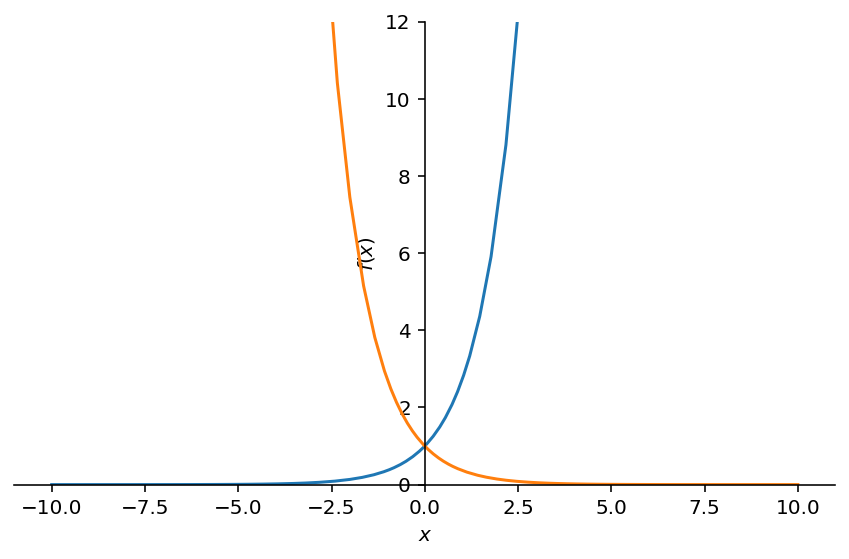

In [14]:
plot(exp(x), 
     exp(-x),
     ylim=(0, 12))

Note that $e^{2.3} \approx 10$. We can find the exact value with the $log()$ function, which is the inverse of exponentials.

In [15]:
import numpy as np

np.log(10)

2.302585092994046

**Logarithms.**

We will dicuss logarithms in more detail soon. Suffice to say, it serves as the inverse of exponential:

$$ \ln(\exp(x)) = \exp(\ln(x)) = x$$

One recent example for the need of logarithms was to visualize exponential growth (e.g., COVID infections):

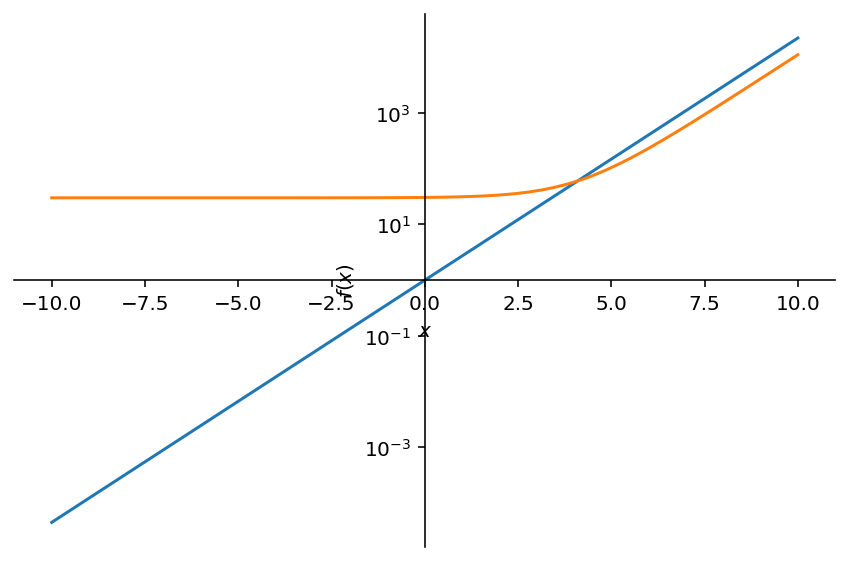

In [16]:
plot(exp(x),
    30 + 0.5*exp(x),
     yscale="log")

Notice that while we plotted two exponential functions, they appear as straight lines on a log scale plot. Similarly, non-exponential scaling (e.g., the start of the orange line for $30 + 0.5\exp(x)$) appears 'flat' - thus the idea of "flattening the curve" in a pandemic. Note that the original spread was exponential (a diagonal line) before initial quarantine efforts slowed progress to linear spread.

(Data is from the [Johns Hopkins COVID19 Dashboard](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) via their [GitHub archive](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series).)

<img src="./images/covid2020.png" width="375" />

**Sinusoid / Periodic.**

Both sine and cosine functions have periodicity as we saw above, including multiple maxima and minima, etc.

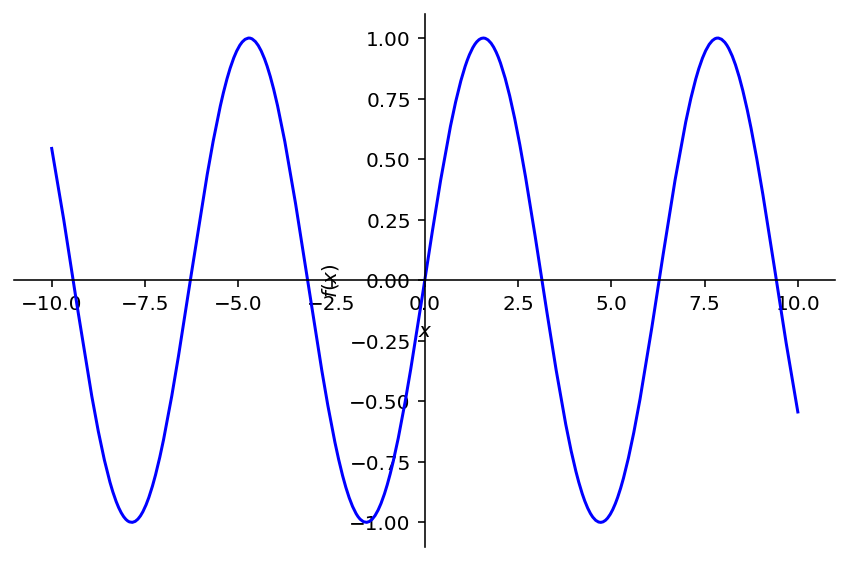

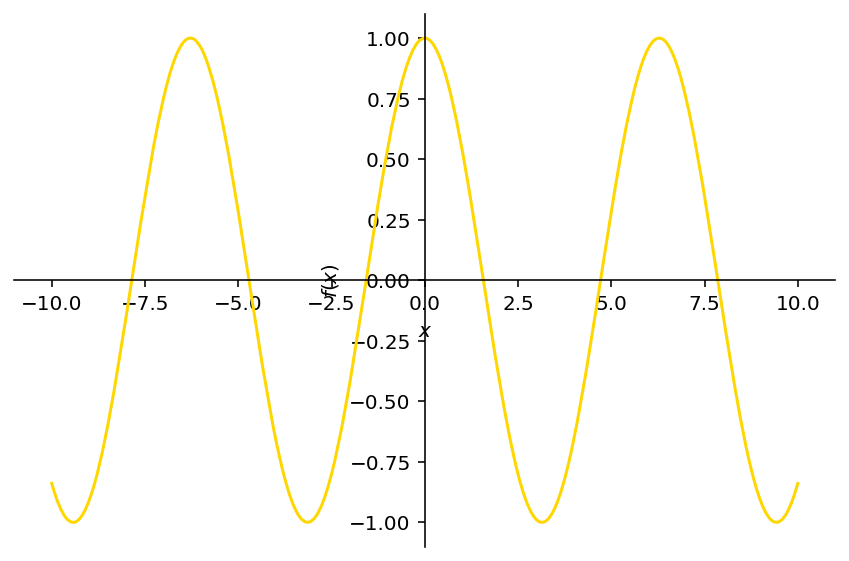

In [17]:
plot(sin(x), line_color='blue')
plot(cos(x), line_color='gold')

**Compound Functions.**

Many physical behaviors can be modeled by a product of functions, e.g.:

$$f(t) = exp(-t/\tau) cos(2\pi\nu t)$$

This is an example for a "*damped*" spring - note that while the $\cos(x)$ is fully periodic, the composite will decrease in amplitude over time because of the $\exp(-t)$ term.

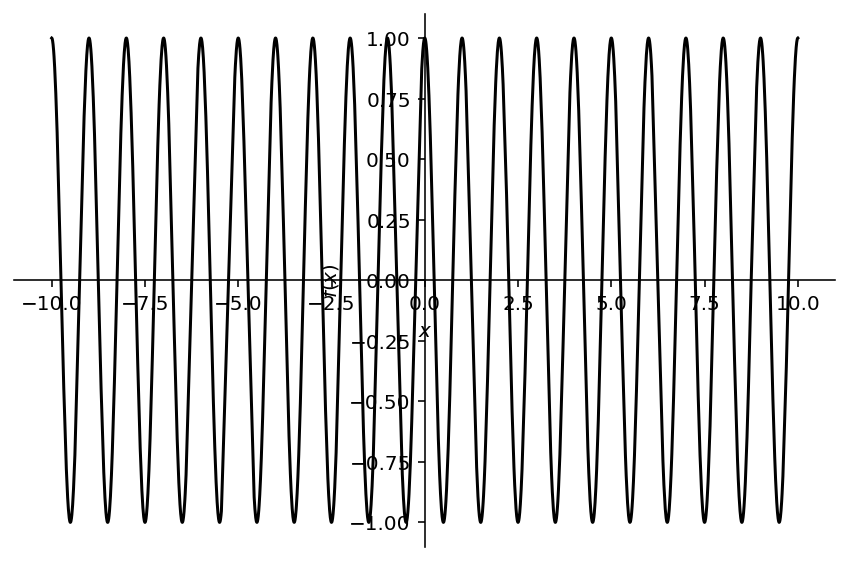

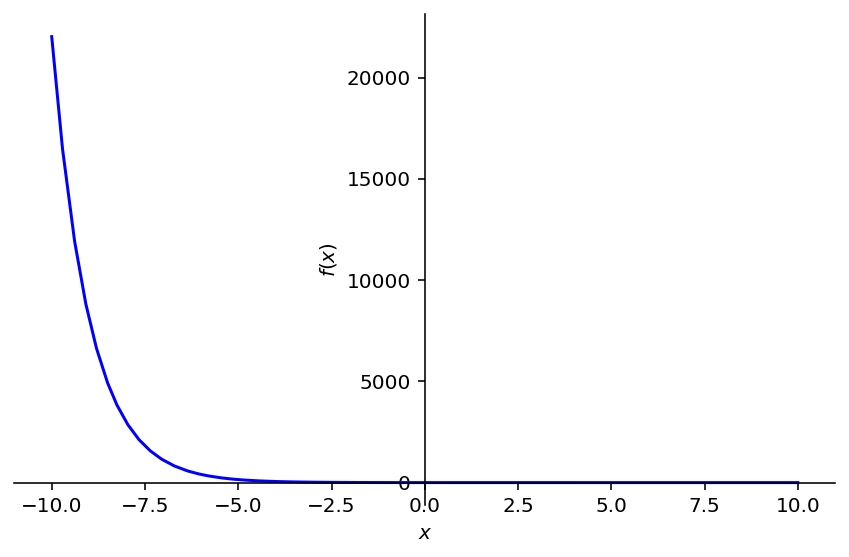

In [18]:
plot(cos(2*pi*x), line_color='black')
plot(exp(-x), line_color='blue')

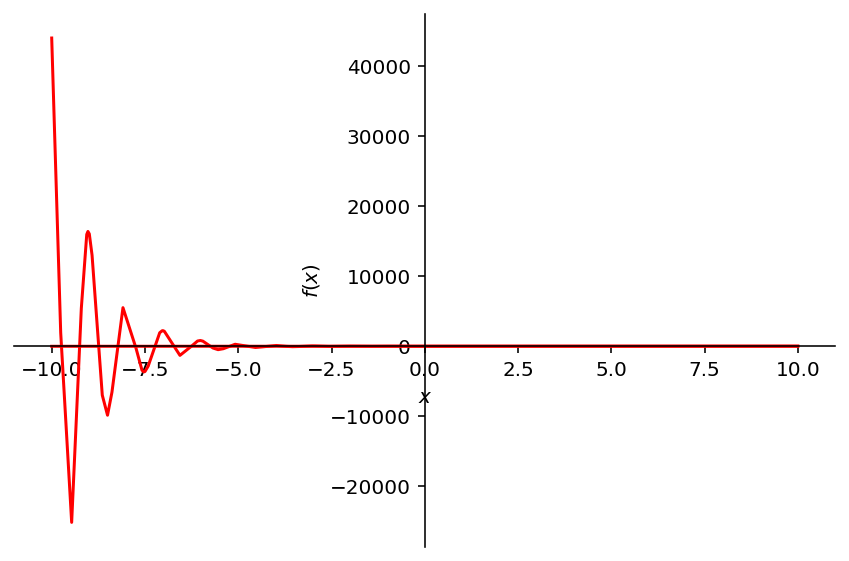

In [19]:
plot(x, 2*exp(-x)*cos(2*pi*x), line_color='red')

**Gaussians.**

Another common function across science is the so-called [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function) which emerges from the so-called [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) or so-called "bell curve" for distributions of large numbers (e.g., standardized test scores, speeds of molecules in a gas, etc.). We will discuss this more later in the course where it shows up frequently in statistics and probability.

$$p(x)=\exp \left(-\frac{1}{2 \sigma^{2}} (x-x_0)^{2}\right)$$

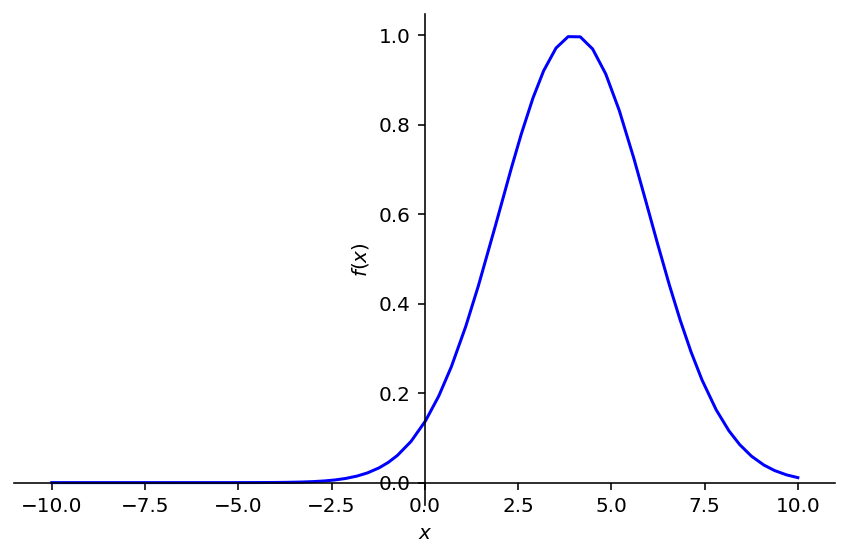

In [20]:
# first Gaussian, sigma = 2.0, mean (x0) = 4.0
sigma = 2.0
x0 = 4.0
plot(exp(-1.0/(2.0*sigma**2) * (x - x0)**2), line_color='blue')

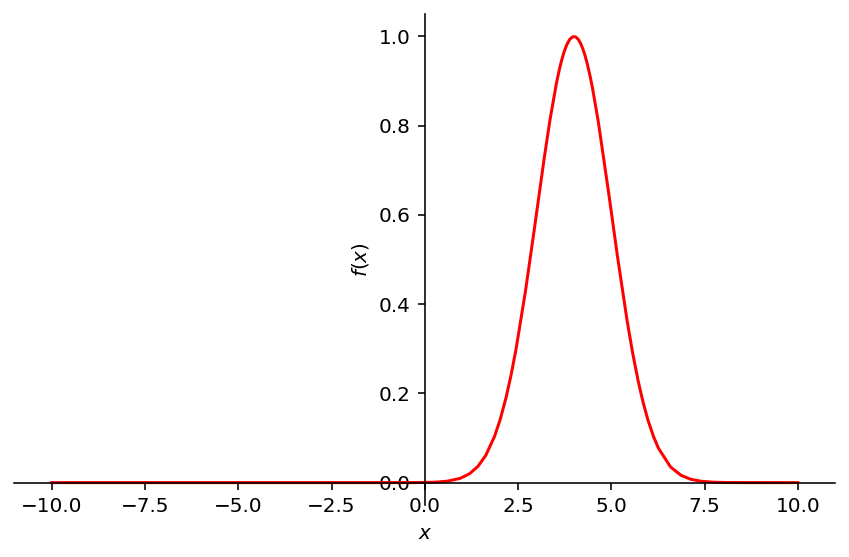

In [21]:
# plot a narrower Gaussian with sigma = 1.0 and same x0
sigma2 = 1.0
x0 = 4.0
plot(exp(-1.0/(2.0*sigma2**2) * (x - x0)**2), line_color='red')

-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>